In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats

In [2]:
athlete_data=pd.read_csv('Forbes_Richest_Atheletes.csv')
athlete_data

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [3]:
    data_num=athlete_data.copy()
    data_num.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [4]:
data_num['Nationality'].unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

In [5]:
data_num['Sport'].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

In [6]:
data_num.describe(include='O')

,Name,Nationality,Previous Year Rank,Sport
count,301,301,277,301
unique,82,22,36,29
top,Tiger Woods,USA,>10,Basketball
freq,19,206,36,54


In [7]:
#data cleaning
data_num['Sport'].replace(['boxing','auto racing','Auto racing','golf','basketball','ice hockey','tennis','Auto Racing (Nascar)','American Football / Baseball','soccer','baseball'],['Boxing','Auto Racing','Auto Racing','Golf','Basketball','Ice Hockey','Tennis','NASCAR','Baseball','Soccer','Baseball'],inplace=True)
mode_of_attrib= data_num.mode().iloc[0]
data_num['Previous Year Rank'][data_num['Previous Year Rank']=='?']=mode_of_attrib
data_num['Previous Year Rank'][data_num['Previous Year Rank']=='??']=mode_of_attrib
data_num.fillna(mode_of_attrib,inplace=True)
data_num.isnull().sum()

S.NO                    0
Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [8]:
data_num.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,>10,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,>10,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,>10,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,>10,Auto Racing,1990,10.0
4,5,Alain Prost,France,5,>10,Auto Racing,1990,9.0


In [9]:
data_num.drop(['S.NO','Current Rank','Year'],axis=1).describe()

,earnings ($ million)
count,301.000000
mean,45.516279
std,33.525337
min,8.100000
25%,24.000000
50%,39.000000
75%,59.400000
max,300.000000


In [10]:
data_num.drop(['Previous Year Rank'],axis=1).describe(include='object')

,Name,Nationality,Sport
count,301,301,301
unique,82,22,18
top,Tiger Woods,USA,Basketball
freq,19,206,81


### Summary of attributes are:


1. The number of data available are in total of 301 counts.
2. Their is  no of 22 different nationality between 301 athlete where USA  has the most repeated nationality of 206 count among them.
3. Likewise,Tiger woods is also seen frequent in the above data.
4. Whereas, in Sport category,basketball remains at the top by having frequency of 81.

##### For Earnings:

1. The average income among athlete are in between 45 millions.
2. The deviation from mean is of value 33.52.
3. The value is between 8 million to 300 million .
4. 25% values are below 24.
5. Median is 39 so 50 % value lies below 39.Similarly,59.4 values are below 75% of 301 count.
6. Mean(45.15) is less than median(39),which indicates it is right skewed.

In [11]:
# list of Athlete with their nationlaity ,sport and name having most number of namne repeated on data.
athlete = data_num.groupby(['Name','Nationality','Sport'])['Name'].count().reset_index(name='Count').sort_values('Count', ascending=False).head(10).reset_index(drop=True)
athlete

,Name,Nationality,Sport,Count
0,Tiger Woods,USA,Golf,19
1,Michael Jordan,USA,Basketball,19
2,Kobe Bryant,USA,Basketball,14
3,LeBron James,USA,Basketball,13
4,Roger Federer,Switzerland,Tennis,12
5,Phil Mickelson,USA,Golf,11
6,Cristiano Ronaldo,Portugal,Soccer,10
7,David Beckham,UK,Soccer,9
8,Lionel Messi,Argentina,Soccer,9
9,Mike Tyson,USA,Boxing,8


#### BY looking at above data we can make differern observations like:

1. Above table shows top 10 athlete with most name repeated during the period of 1990 to 2020
2. As expected Tiger Woods is at top with 19 counts.Also, we can  see that Michael Jordan name has same count to him followed by Kobe Bryant.
3. Overall,we can observe that most are from USA.

In [12]:

earnings = data_num.groupby(['Name','Nationality','Sport'])['earnings ($ million)'].sum().reset_index().sort_values('earnings ($ million)', ascending=False).head(10).reset_index(drop=True)
earnings

,Name,Nationality,Sport,earnings ($ million)
0,Tiger Woods,USA,Golf,1373.8
1,LeBron James,USA,Basketball,844.8
2,Floyd Mayweather,USA,Boxing,840.0
3,Cristiano Ronaldo,Portugal,Soccer,787.1
4,Roger Federer,Switzerland,Tennis,781.1
5,Michael Jordan,USA,Basketball,738.8
6,Lionel Messi,Argentina,Soccer,715.5
7,Kobe Bryant,USA,Basketball,601.1
8,Phil Mickelson,USA,Golf,519.9
9,David Beckham,UK,Soccer,362.4


 ## From Earning perspective we can obeserve following characterstics like:

1. Tiger Woods takes the lead by total number of 1373.8 million dollar in the period between two decade.
2. Lebron james being on second position and kobe bryant on seventh position   is quite unreal becuase their count diffrence was 1 with James having low.
3. We can observe that having many count doesnt insure making more money.

# EDA (Explotary Data Analysis)

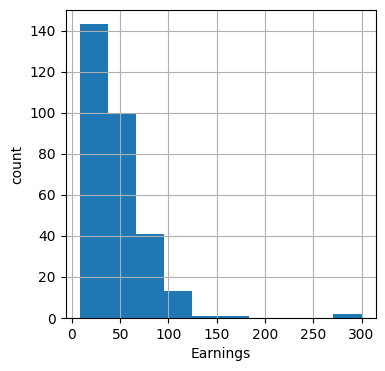

In [13]:
data_num['earnings ($ million)'].hist(figsize=(4,4))
plt.xlabel('Earnings')
plt.ylabel('count')
plt.show()

<Axes: ylabel='earnings ($ million)'>

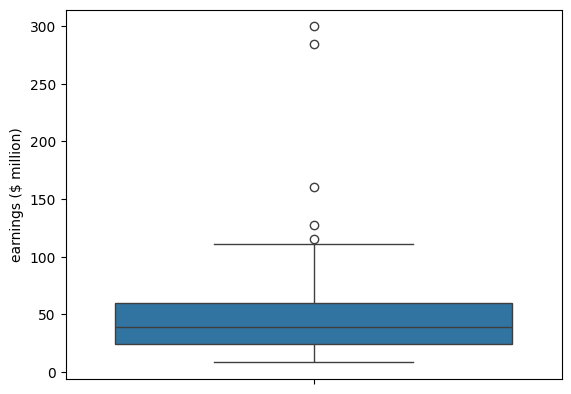

In [14]:
sns.boxplot(data_num['earnings ($ million)'])

### The above histogram shows that:

1) Earning attribute is not symmetric.
2) It is right-skewed(This means that the majority of athletes have lower earnings, while a small number of athletes have much higher earnings).
3) few people has earned more than 100 million.
4) In conclusion, the earnings distribution among athletes in the dataset is right-skewed, with a few athletes earning significantly higher amounts compared to the majority of athletes who earn lower amounts.

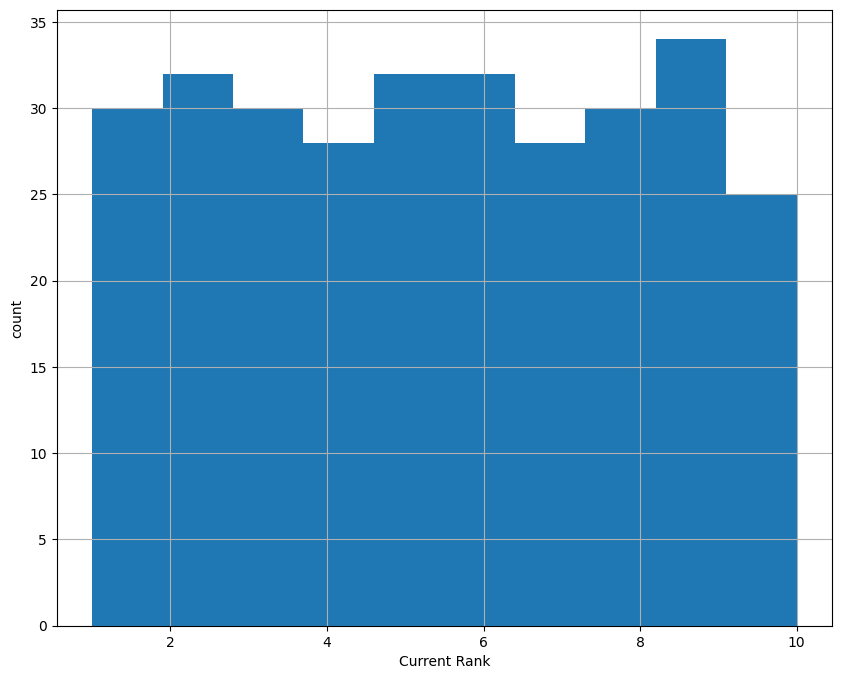

In [15]:
data_num['Current Rank'].hist(figsize=(10,8))
plt.xlabel('Current Rank')
plt.ylabel('count')
plt.show()

<Axes: ylabel='Current Rank'>

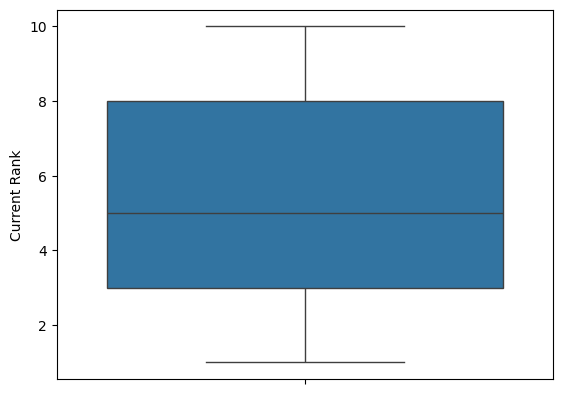

In [16]:
sns.boxplot(data_num['Current Rank'])

### Description of above histogram:

1. Current rank attribute shows asymmetric distribution.
2. There is rank of 1 to 10.

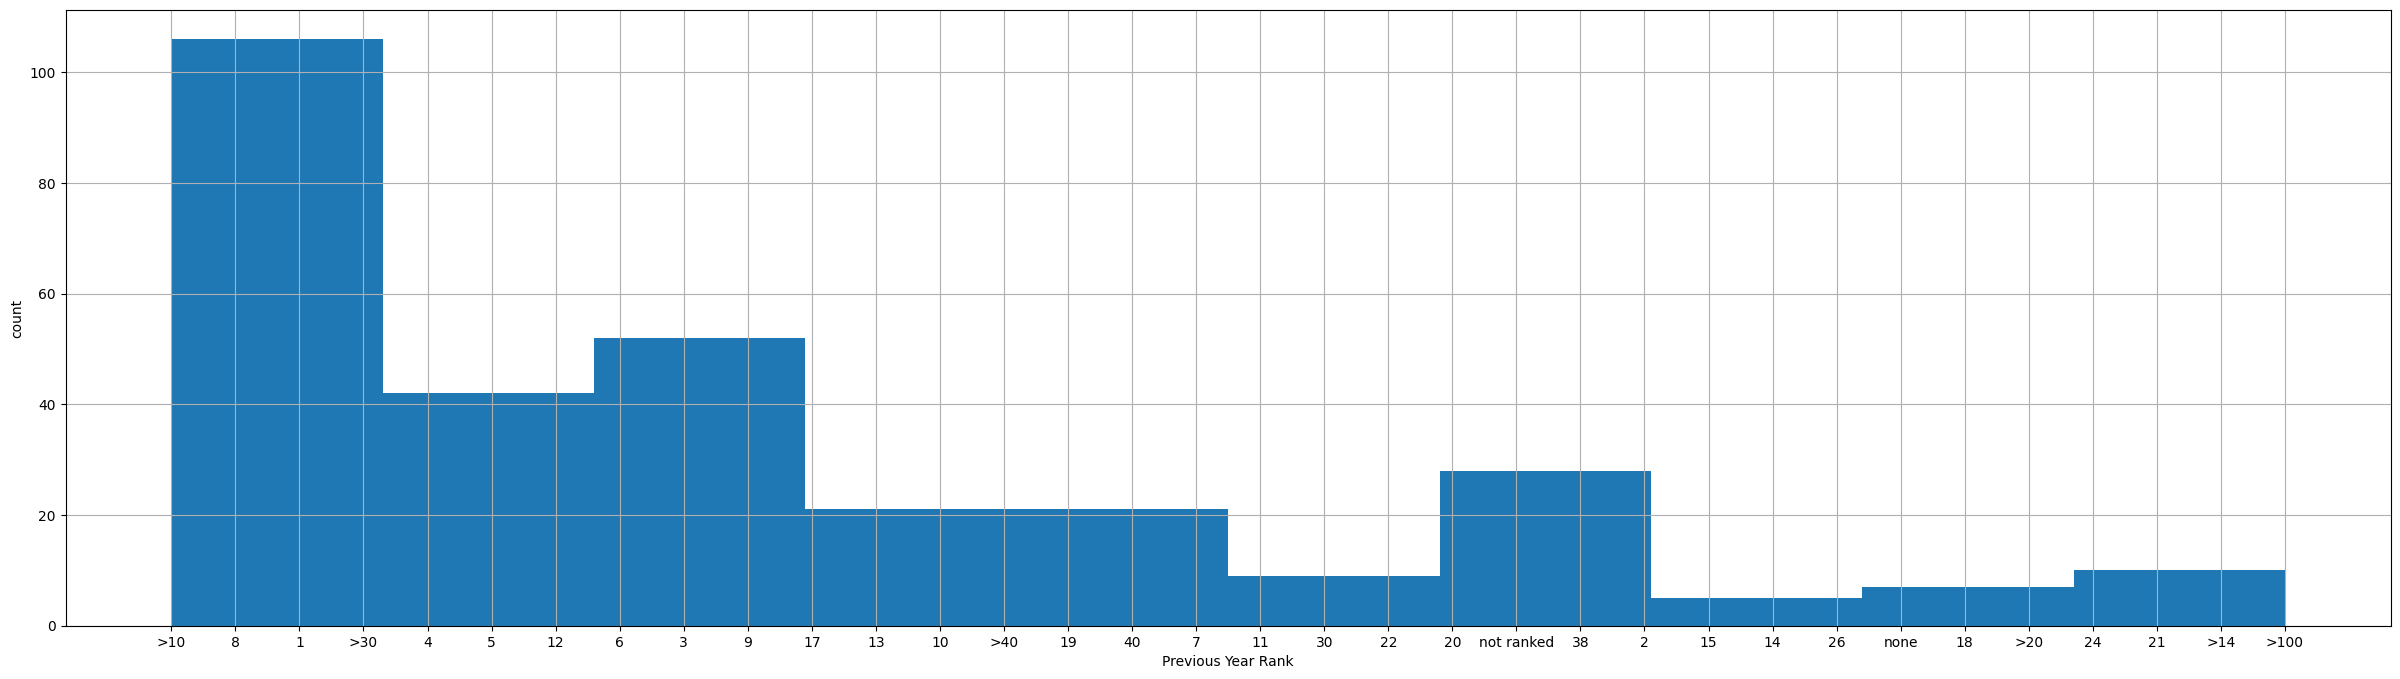

In [17]:
data_num['Previous Year Rank'].hist(figsize=(30,8))
plt.xlabel('Previous Year Rank')
plt.ylabel('count')
plt.show()

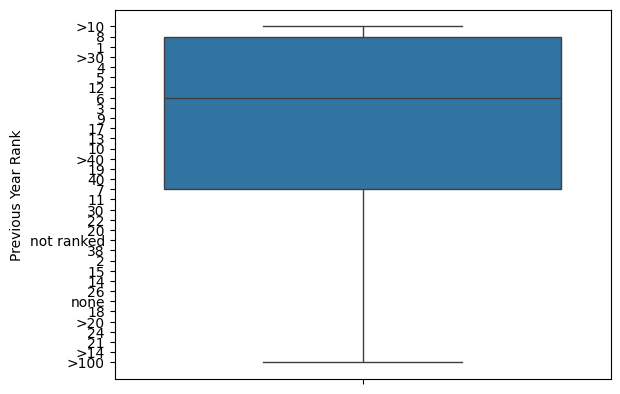

In [18]:
sns.boxplot(data_num['Previous Year Rank'])
plt.show()


### Above histogram indicates that:

1. Previous Year Rank attribute isnot asymmetrical.
2. It is left skewed.3. Most athlete are in range of >10 ,1  and 8.Similary in athlete having previous year Rank 15,14 and 26 are low.

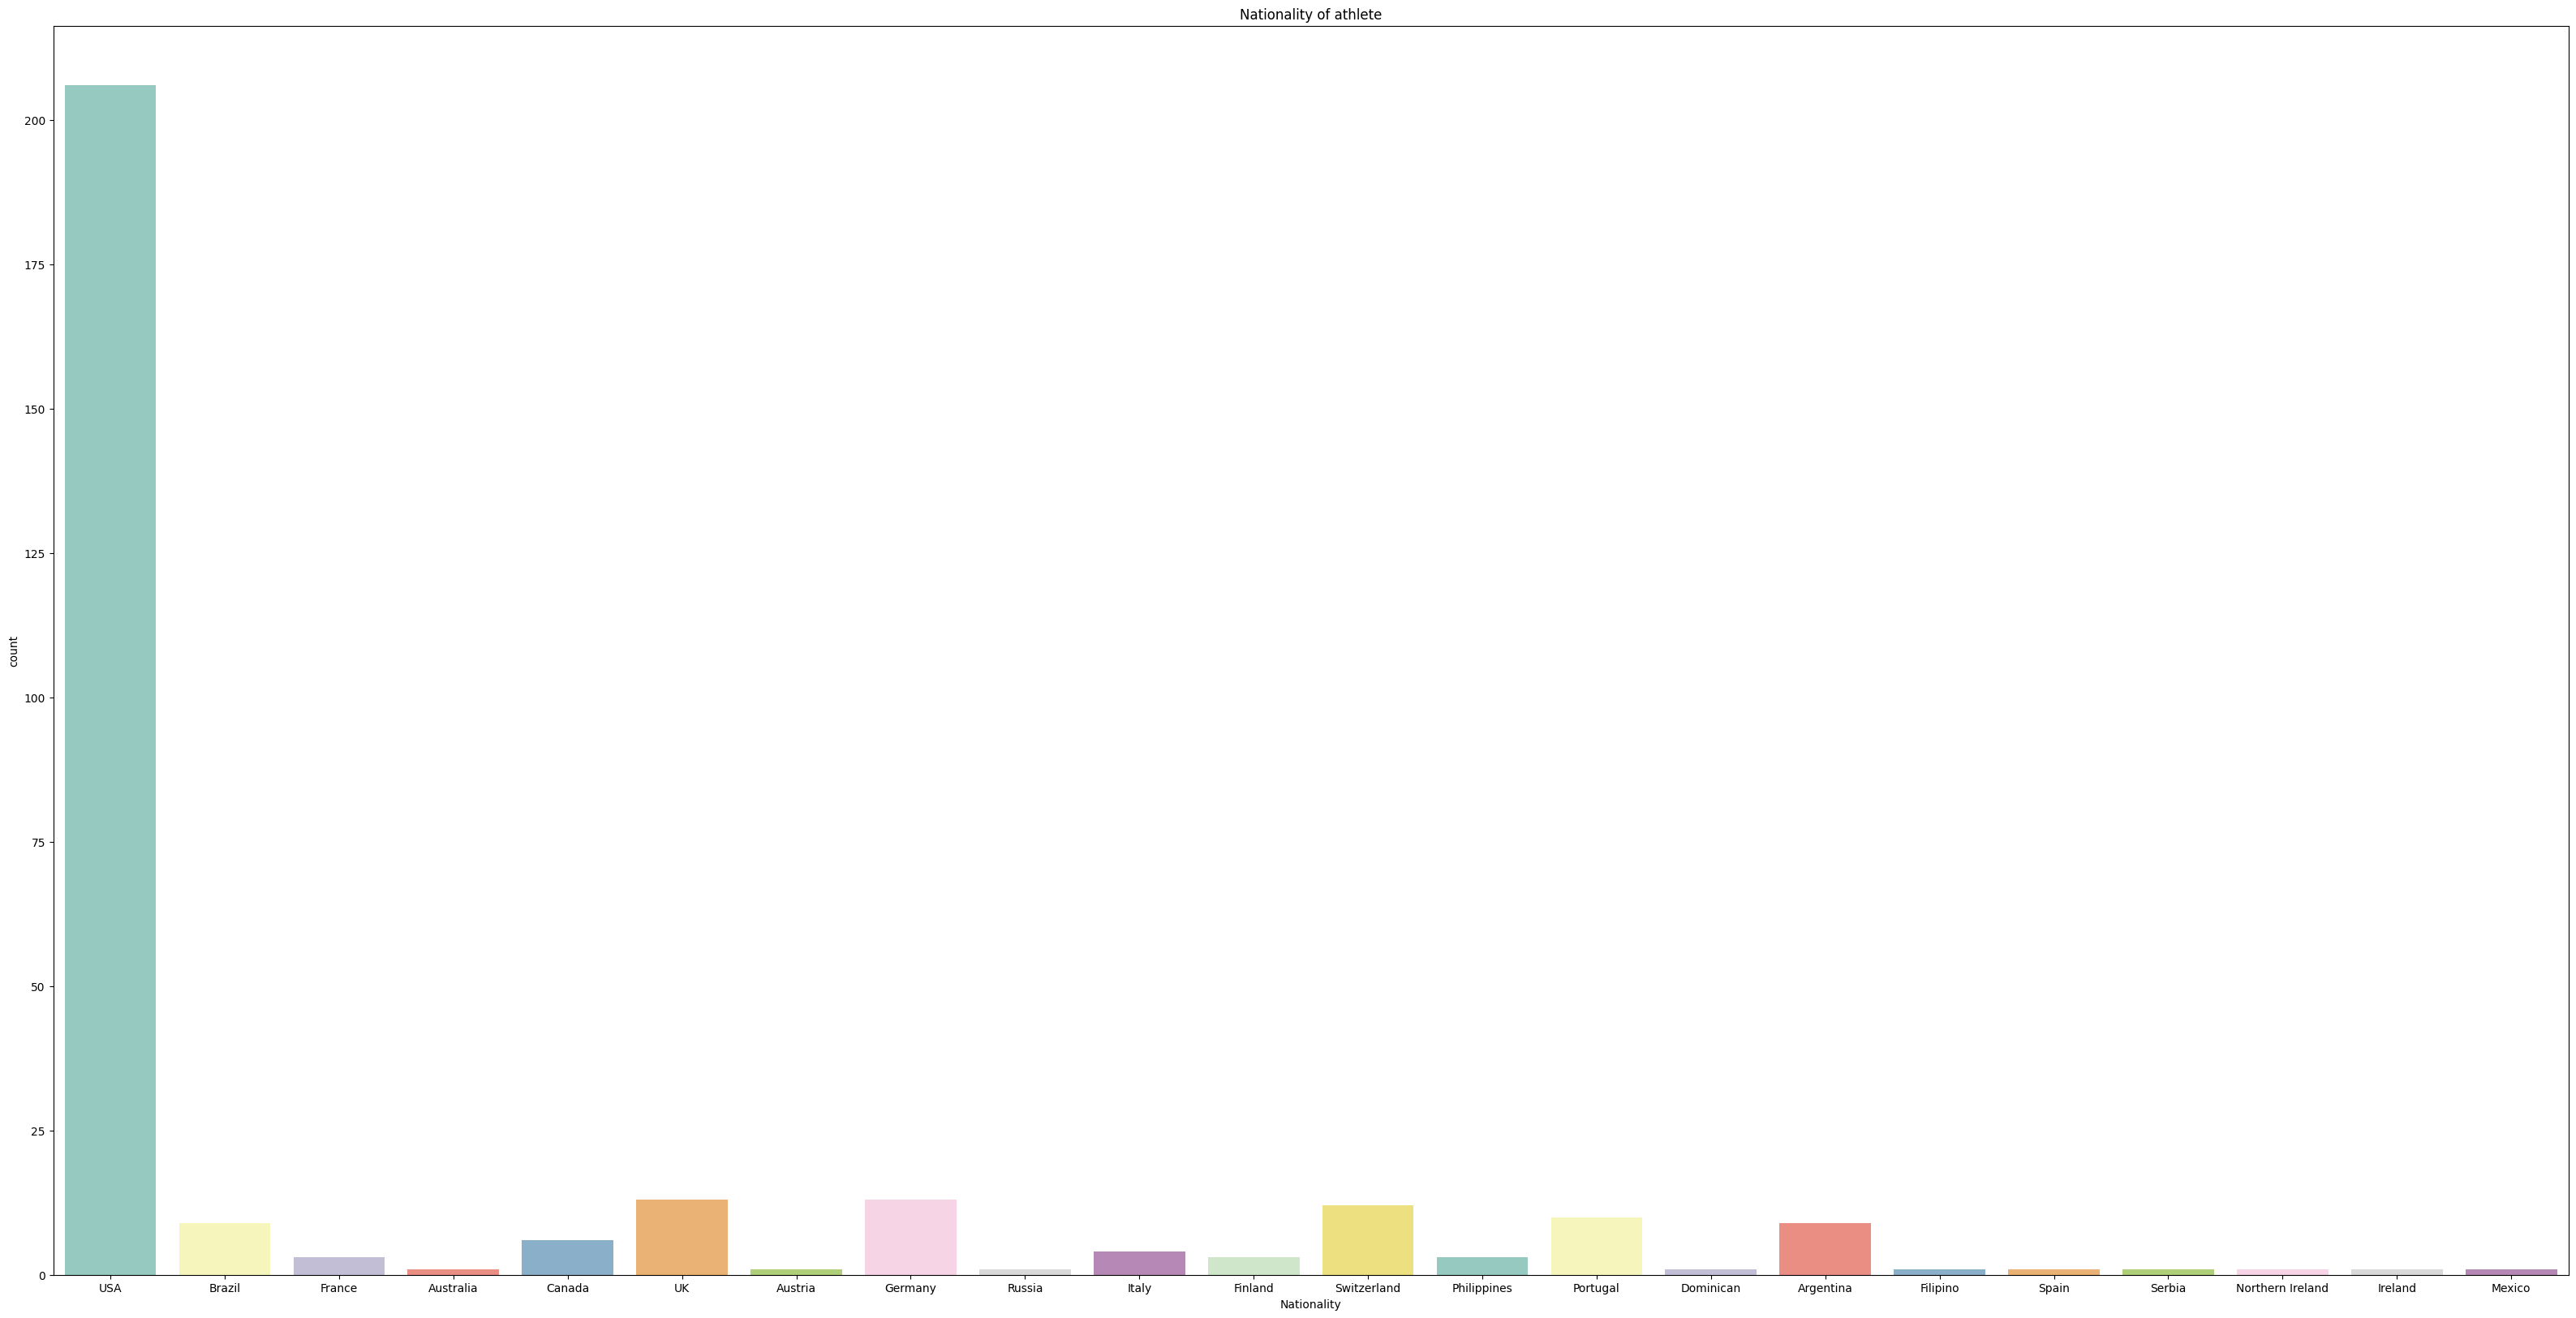

In [19]:
plt.figure(figsize=(40,20))
sns.countplot(x='Nationality',data=data_num,palette="Set3")
plt.title('Nationality of athlete')
plt.show()


1. Above bar chat depicts the nationality of  athlete  on forbes richest list.
2. USA has the  most athlete on forbes richest list.
3. UK , Germany ,Switzerland,Portugal and Argentina has almost same number of athlete.
4. In comparision, USA has above 200 athlete on forbes list which is almost more than 180 count from second highest country Germany.

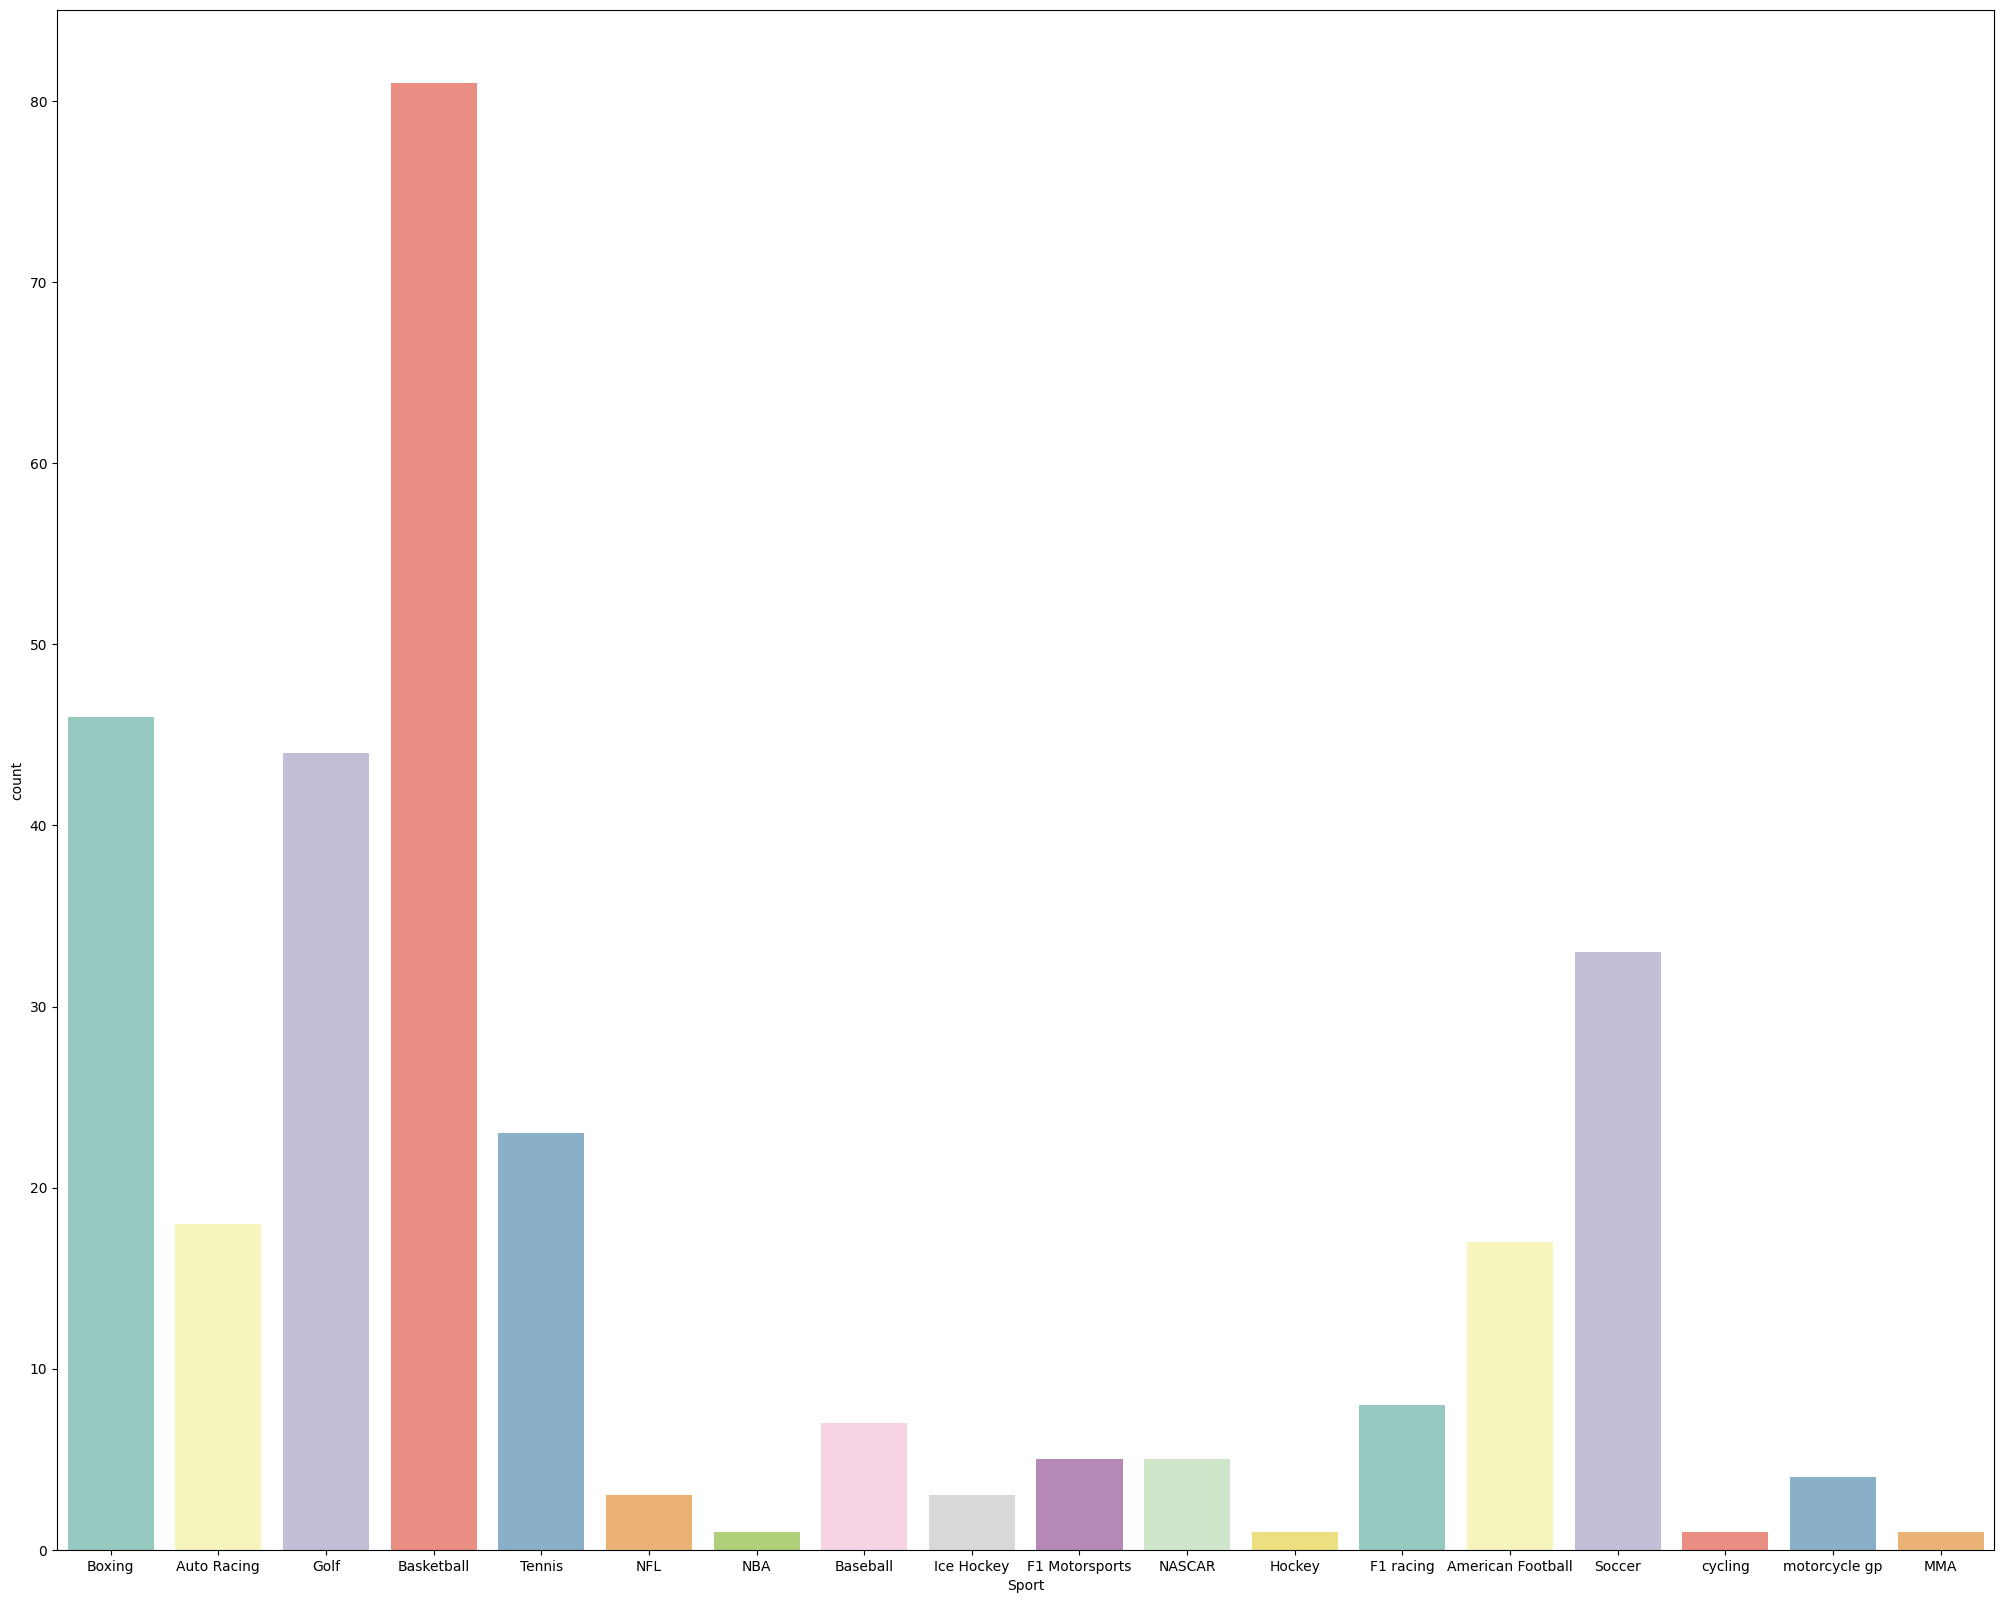

In [20]:

plt.figure(figsize=(25,20))
sns.countplot(x='Sport',data=data_num,palette='Set3')
plt.show()

1. Above bar chat depicts the category os sports  of  athlete  on forbes richest list.
2. Basketball is at top with more than 80 athlete followed by boxing with above 45 athlete.
3. lowest number of athlete are from sport like NBA,Hockey,Cycling and mma.


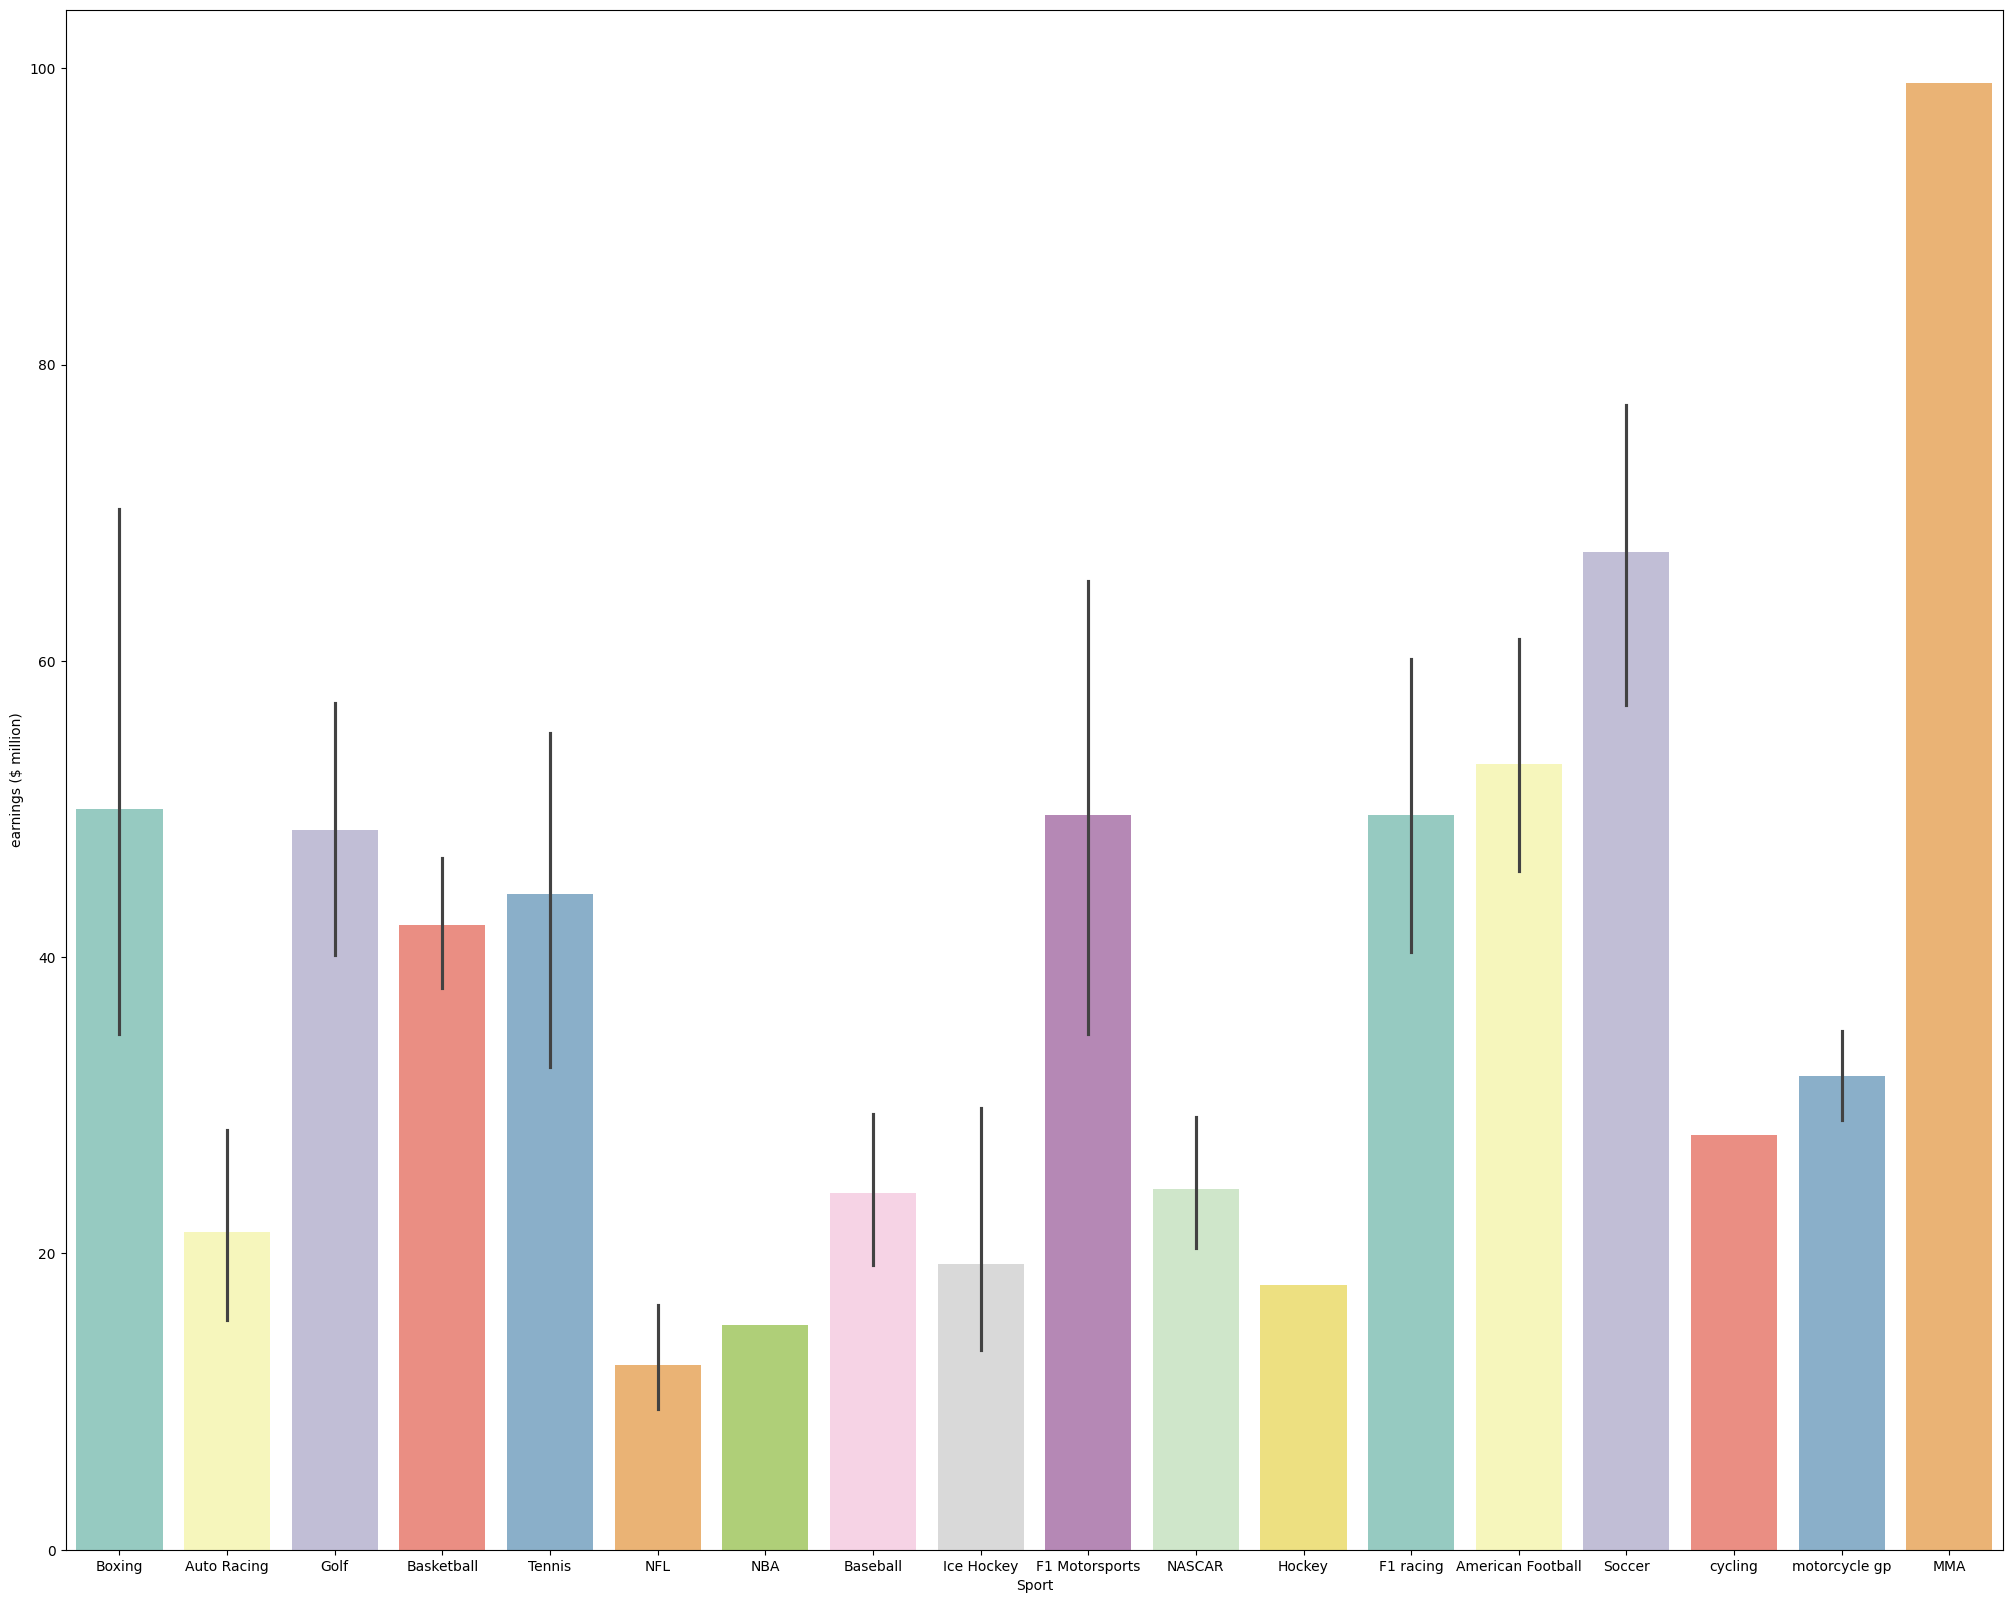

In [21]:
plt.figure(figsize=(25,20))
sns.barplot(x='Sport',y='earnings ($ million)',data=data_num,palette='Set3')
plt.show()

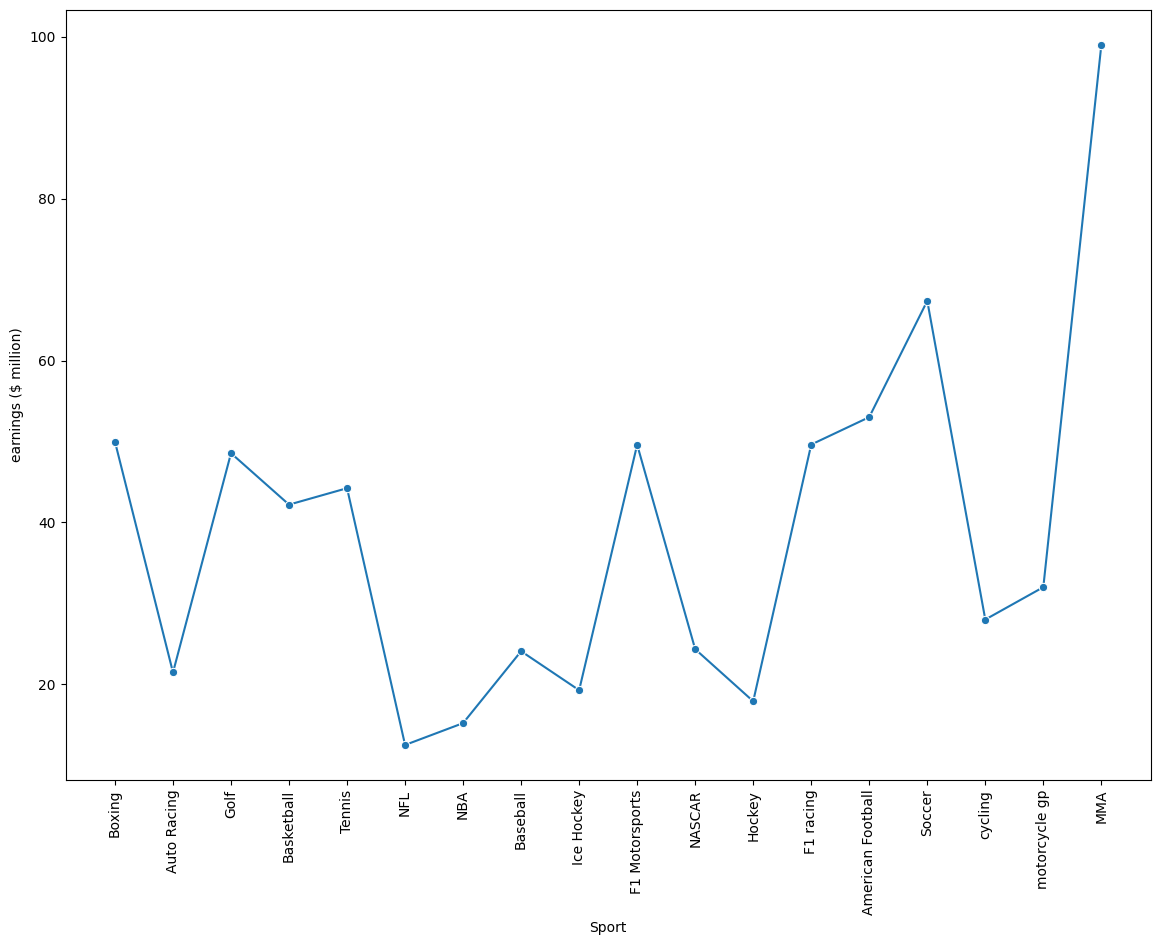

In [22]:
plt.figure(figsize=(14,10))
sns.lineplot(x='Sport',y='earnings ($ million)',data=data_num,marker='o',ci=None)
plt.xticks(rotation=90)
plt.show()

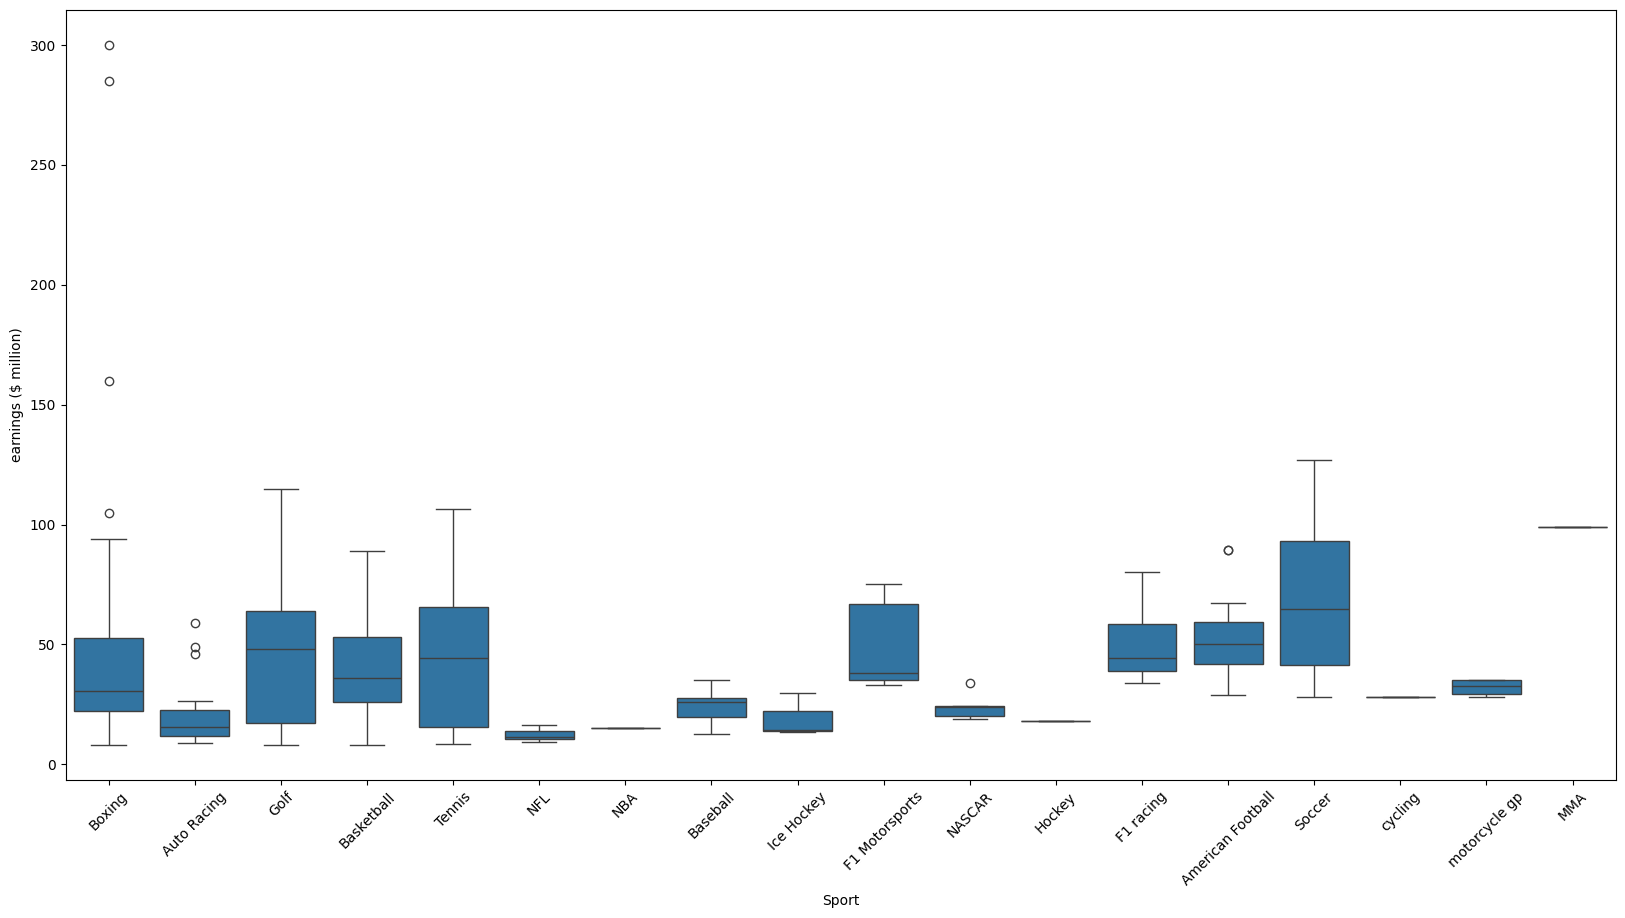

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Sport',y='earnings ($ million)',data=data_num)
plt.xticks(rotation=45)
plt.show()

### From above diagrams we can observe that:


1. Above bar chart and line graph depicts the earning  of  athlete  based on their respective sport.
2. It shows MMA athletes has the most  earning in comparison . Whereas,NFl has lowest with less than 20 million.
3. From above two chart,we can observe that even though there are less MMA athlete but their gross earning is higher than  other sport.
4. Eventhough,Basketball had highest athlete on forbes list but their income is less in comparison to soccer or MMA.
5. We can see that the highest earner is from Boxing sport of about 300 milion.


In [24]:
from scipy.stats import f_oneway
for sport in data_num['Sport'].unique():
    sports_earnings[sport] = data_num[data_num['Sport'] == sport]['earnings ($ million)']
f_statistic, p = f_oneway(*sports_earnings.values())

print('F-statistic:', f_statistic)
print('p-value:', p)

if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else:
    print("we accept null hypothesis hence independent")

NameError: name 'sports_earnings' is not defined

Therefore,we can say that earding  is related to sports.

In [ ]:
plt.figure(figsize=(14,10))
sns.lineplot(x='Year',y='earnings ($ million)',data=data_num,marker='o',ci=None)
plt.show()

1. Above line graph shows the difference in earning over the period of time .
2. We can observe that athlete during 1990 and 1995 earned less than to the athlete of 2020 eventhough they are on the richest list.
3. It shows the increament of earnings among the athleet over the period of time.

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data_num, x='Current Rank', y='earnings ($ million)')
plt.title('Scatter plot of Current Rank vs. Earnings')
plt.show()

In [ ]:
plt.figure(figsize=(20, 115))  
sns.catplot(x='Current Rank', y='earnings ($ million)', col='Sport', data=data_num, kind='point', col_wrap=4)
plt.show()

From above factor plot we can observe that athlete's earnings are dependent on their respective rank.
Where earning is high for rank 1 athlete  than two  ranked and three ranked athlete.Whereas ,we can see some exception in like MMA and motorcycle gp but in most cases  athlete earns more due to the high rank in most of the sport given in data.

In [ ]:
from scipy.stats import f_oneway

f_statistic, p = f_oneway(data_num[data_num['Current Rank'] == 1]['earnings ($ million)'],
                                 data_num[data_num['Current Rank'] == 2]['earnings ($ million)'],
                                 data_num[data_num['Current Rank'] == 3]['earnings ($ million)'],
                                 data_num[data_num['Current Rank'] == 4]['earnings ($ million)'],
                                 data_num[data_num['Current Rank'] == 5]['earnings ($ million)'],
                                 data_num[data_num['Current Rank'] == 6]['earnings ($ million)'],
                                 data_num[data_num['Current Rank'] == 7]['earnings ($ million)'],
                                 data_num[data_num['Current Rank'] == 8]['earnings ($ million)'],
                                 data_num[data_num['Current Rank'] == 9]['earnings ($ million)'],
                                 data_num[data_num['Current Rank'] == 10]['earnings ($ million)'])

print('F-statistic:', f_statistic)
print('p-value:', p_value)
if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else: 
    print("we accept null hypothesis hence independent")


Therefore from Anova test we can verify that Current rank and earning are dependent statistically.

In [ ]:
plt.figure(figsize=(60,20))
sns.catplot(x='Nationality',y='earnings ($ million)',data=data_num,kind='point')
plt.xticks(rotation=90)
plt.show()


In above factor plot we can see that ireland nationality athlete has made the most money.Wheras USA athletes havent done great in earning money eventhough they have high count on list.So it verifies that nationality isn't related to athlete making money.


In [ ]:
sampled_data = data_num.sample(frac=0.05, replace=True, random_state=1)
c_t = pd.crosstab(sampled_data['Nationality'], sampled_data['earnings ($ million)'], margins=False)
c_t

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stst,p,dof,expected = chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)

if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else:
    print("we accept null hypothesis hence independent")

Hence,from chi square test we can say that nationality and income are independent.